In [129]:
#Longitude Latitude Magnitude
#import dependencies

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy
from sompy.visualization.bmuhits import BmuHitsView
import sys
np.set_printoptions(threshold=sys.maxsize)

In [130]:
dFrame = pd.read_csv('somDatasetLLM.csv')
quakeLLMRecArr  = dFrame.to_records(index=False)
quakeLLM = np.array(quakeLLMRecArr.tolist())

quakeLLM

array([[172.16794, -43.52731,   7.2    ],
       [172.32367, -43.55426,   5.815  ],
       [172.38512, -43.6585 ,   5.114  ],
       [172.29477, -43.5661 ,   5.532  ],
       [172.18575, -43.4711 ,   5.434  ],
       [172.11847, -43.49201,   5.162  ],
       [172.11028, -43.62283,   5.335  ],
       [172.21217, -43.59541,   4.921  ],
       [172.4296 , -43.68362,   4.565  ],
       [172.54439, -43.58787,   4.75   ],
       [172.30362, -43.58586,   4.971  ],
       [172.37521, -43.66354,   4.822  ],
       [172.23647, -43.64153,   4.945  ],
       [172.27835, -43.63268,   4.912  ],
       [172.41315, -43.60732,   4.979  ],
       [172.16673, -43.60926,   5.144  ],
       [172.27443, -43.61766,   4.569  ],
       [172.40707, -43.64999,   4.491  ],
       [172.16286, -43.46124,   5.359  ],
       [172.40086, -43.60709,   4.727  ],
       [172.17003, -43.47633,   4.817  ],
       [172.23813, -43.57198,   4.516  ],
       [171.90025, -43.64566,   4.414  ],
       [172.35774, -43.6156 ,   4.

In [131]:
mapsize = [50,50] #
som = sompy.SOMFactory.build(quakeLLM, 
                             mapsize, 
                             mask=None, 
                             mapshape='planar', 
                             lattice='rect', 
                             normalization='var', 
                             initialization='pca', 
                             neighborhood='gaussian', 
                             training='batch', 
                             name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

som.train(n_job=1, shared_memory = 'no', verbose='debug')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 3290 and data dimension is 3
      > map size is 50,50
      > array size in log10 scale is 7.392257161341674
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.026000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 23

 find_bmu took: 0.314000 seconds
 update_codebook_voronoi took: 0.013000 seconds
 epoch: 1 ---> elapsed time:  0.391000, quantization error: 0.756434

 find_bmu took: 0.246000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 2 ---> elapsed time:  0.334000, quantization error: 0.657705

 find_bmu took: 0.243000 seconds
 update_codebook_voronoi took: 0.016000 seconds
 epoch: 3 ---> elapsed time:  0.328000, quantization error: 0.530888

 find_bmu took: 0.262000 seconds
 update_codebook_voronoi took: 0.011000 seconds
 epoch: 4 ---> e

 epoch: 28 ---> elapsed time:  0.361000, quantization error: 0.144527

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.013000 seconds
 epoch: 29 ---> elapsed time:  0.367000, quantization error: 0.142596

 find_bmu took: 0.307000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 30 ---> elapsed time:  0.471000, quantization error: 0.140583

 find_bmu took: 0.206000 seconds
 update_codebook_voronoi took: 0.012000 seconds
 epoch: 31 ---> elapsed time:  0.363000, quantization error: 0.138652

 --------------------------------------------------------------
 Final quantization error: 0.138652
 train took: 18.786000 seconds


In [132]:
#view 2D mapview
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


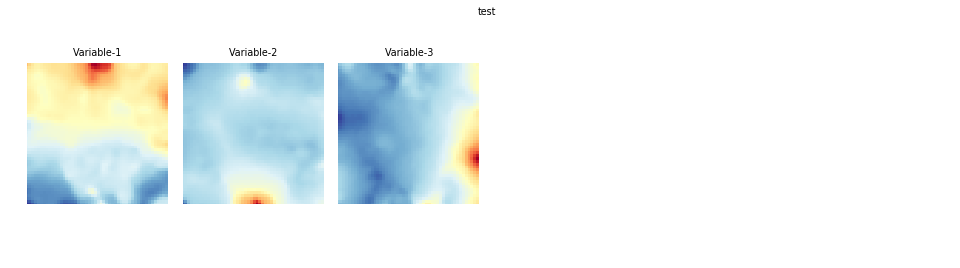

In [133]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1,2], cmap=None, col_sz=6) #which_dim='all' default

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


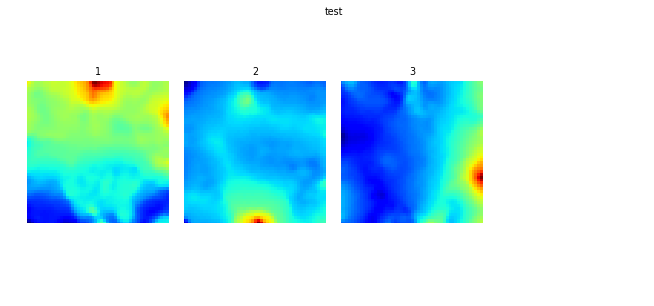

In [134]:
som.component_names = ['1','2','3']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

In [135]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1,

C:\Users\afiqAUT\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


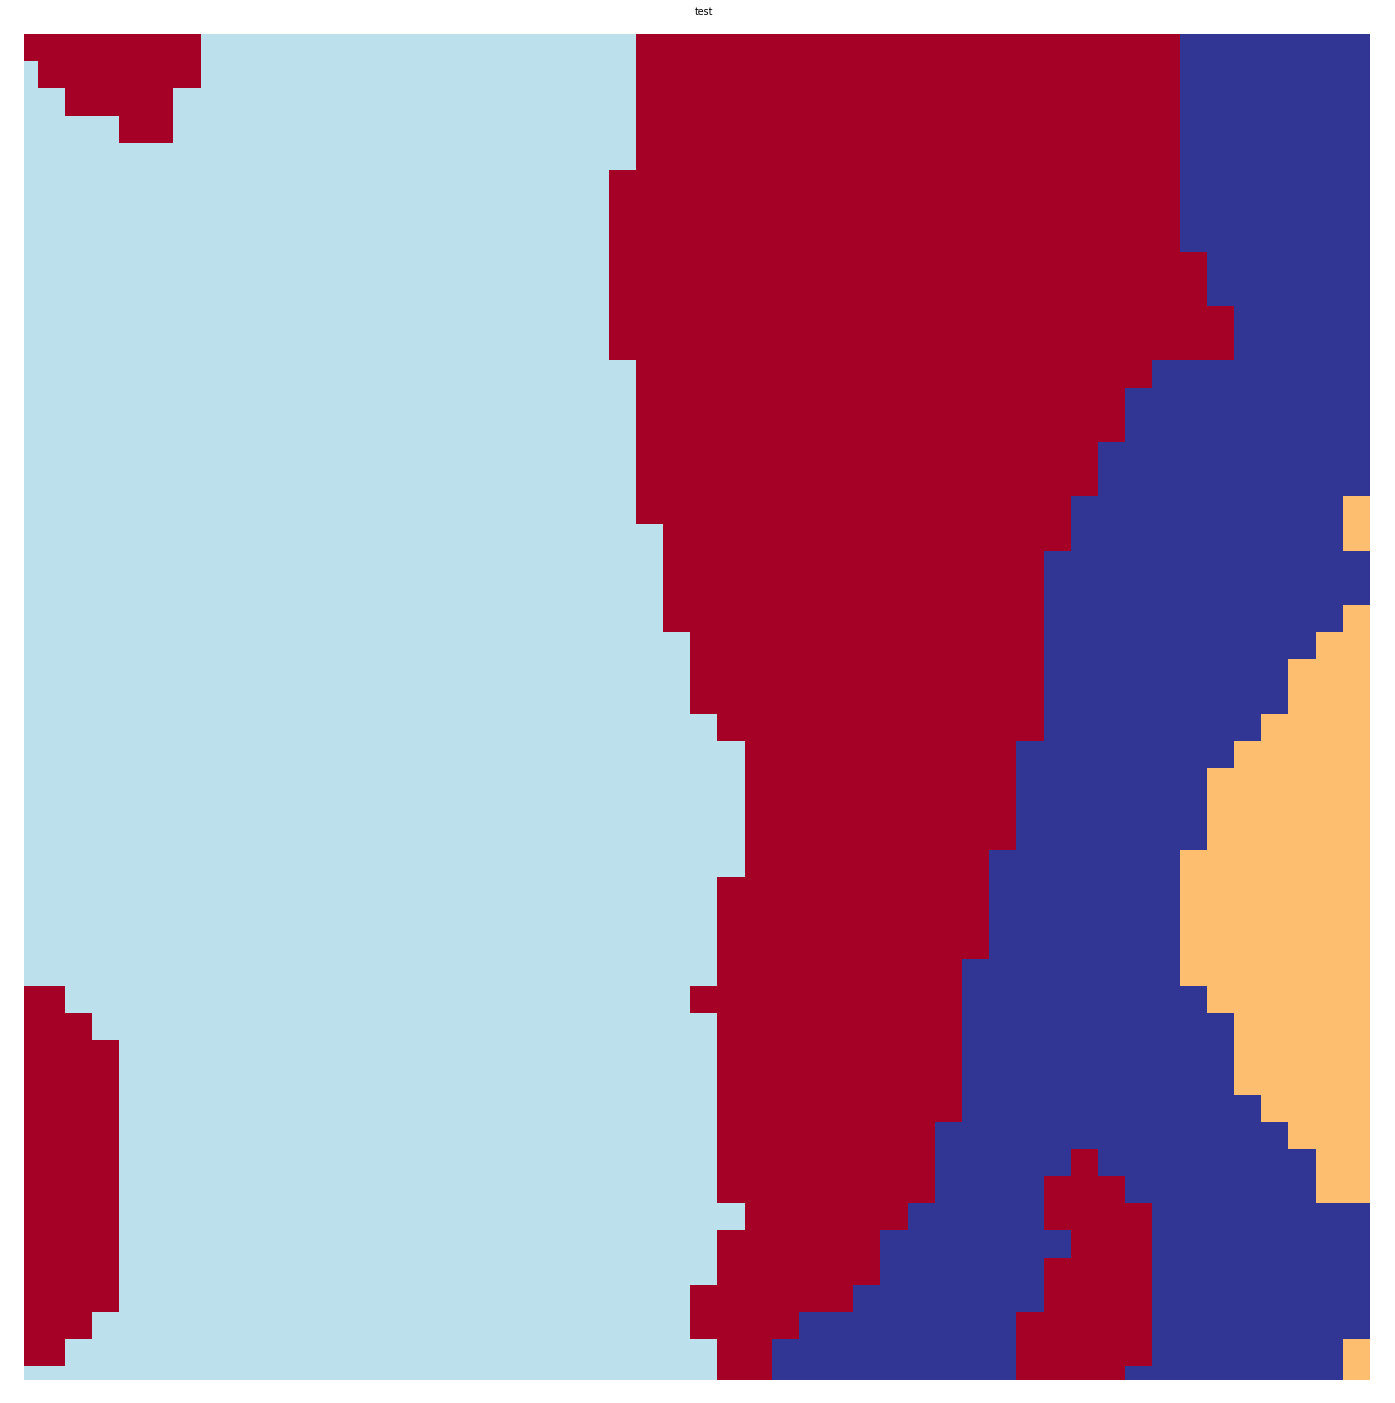

In [136]:
v.show(som, what='cluster')

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


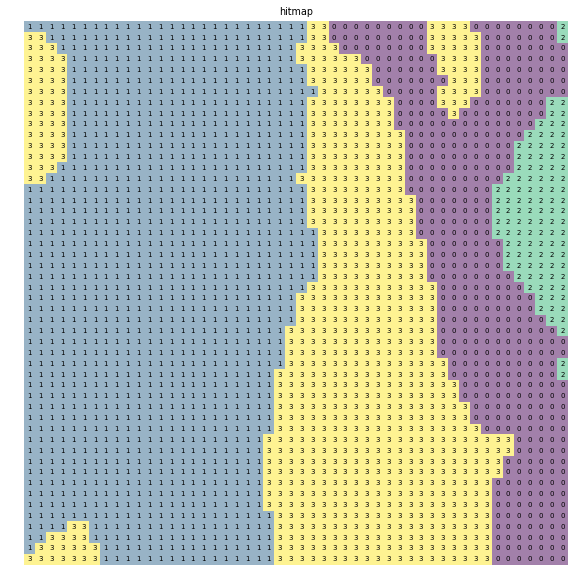

In [137]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=10, show_text=True)
h.show(som)

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


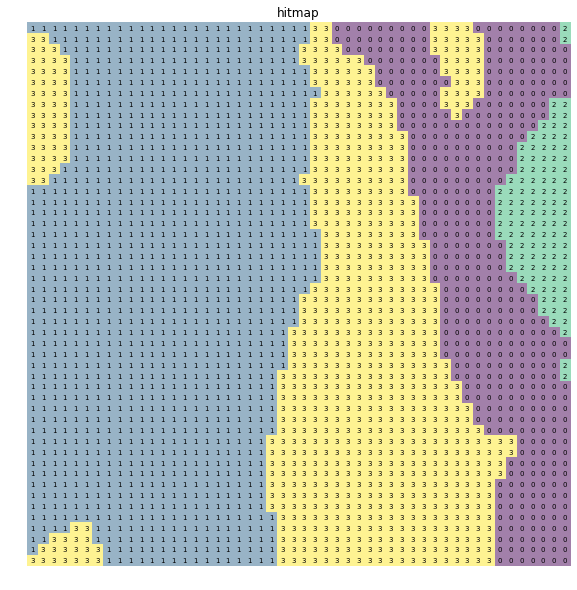

In [138]:
h2 = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=12, show_text=True)
h2.show(som)

In [139]:
som.project_data(quakeLLM) #neuron number

array([1699, 1699, 1598, 1649, 1799, 1799, 1698, 1747, 1496, 1449, 1598,
       1547, 1647, 1597, 1549, 1697, 1595, 1496, 1799, 1498, 1849, 1796,
       1946, 1545, 1694, 1446, 1598,  899, 1847, 1348, 1649, 1646, 1441,
       1695,  949, 1746, 1698, 1498, 1644, 1346,  399, 2483, 1596,  896,
       1491, 1895, 1396, 2333, 1347, 2299,  295, 1189,   48, 1396, 1349,
       1746, 1747, 2098, 2048, 1794,  988, 1999, 2499, 1544, 2099,   49,
         95,  985, 1796, 1195, 1945, 1896, 2299, 1397, 1948, 1890, 1144,
       1843, 2198, 1195, 1847, 1948, 1693,  943, 2448, 1249, 1643, 1838,
       1437, 2499,  489, 1642, 1999, 2499, 2384, 2236, 1348,   95,  448,
        841,  849, 1046, 1687, 1996, 1792, 2397, 2496, 1686, 2438, 2487,
       1643, 2497, 1998, 1445,  449, 1444,  143, 2235, 1679,  527, 1536,
       2435, 2097,   44, 2293,  988,  935,  391, 2288, 1418, 2290, 1134,
       1394, 2140,   92,  982, 2145, 2434, 1538, 1326,  196, 1493,  785,
       1836,  342,  783, 1602, 2343, 1993, 1183, 18

In [140]:
a = som.project_data(quakeLLM)
len(som.project_data(quakeLLM))

3290

In [141]:
som.codebook.matrix

array([[ 1.505598e+00, -3.920092e+00, -3.433270e-01],
       [ 1.247067e+00, -3.637053e+00, -9.699900e-02],
       [ 9.419530e-01, -3.187075e+00,  1.301060e-01],
       [ 7.552450e-01, -2.760618e+00,  2.271380e-01],
       [ 7.189520e-01, -2.381197e+00,  2.378040e-01],
       [ 8.048520e-01, -1.786768e+00,  5.474000e-02],
       [ 8.933520e-01, -1.249299e+00, -2.712610e-01],
       [ 9.194940e-01, -1.080527e+00, -4.149200e-01],
       [ 9.728070e-01, -1.006301e+00, -4.471870e-01],
       [ 1.043279e+00, -9.626380e-01, -4.852120e-01],
       [ 1.054989e+00, -9.539190e-01, -5.964380e-01],
       [ 1.029166e+00, -9.263070e-01, -7.259220e-01],
       [ 1.021893e+00, -8.641020e-01, -8.104080e-01],
       [ 1.043531e+00, -7.764810e-01, -8.634000e-01],
       [ 1.112565e+00, -6.700220e-01, -8.948690e-01],
       [ 1.217649e+00, -5.957200e-01, -8.890020e-01],
       [ 1.337553e+00, -5.259090e-01, -8.430210e-01],
       [ 1.528062e+00, -3.618090e-01, -7.636510e-01],
       [ 1.709387e+00, -2.03

In [142]:
codebookMat = som.codebook.matrix
len(codebookMat)

2500

In [143]:
len(codebookMat[1])

3

In [144]:
a[0] #data instance 0 is nuron number 1699

1699

In [145]:
a[3289] #the last data point occupies neuron 2464

2464

In [146]:
np.where(a == 411)

(array([1937, 3225], dtype=int64),)

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


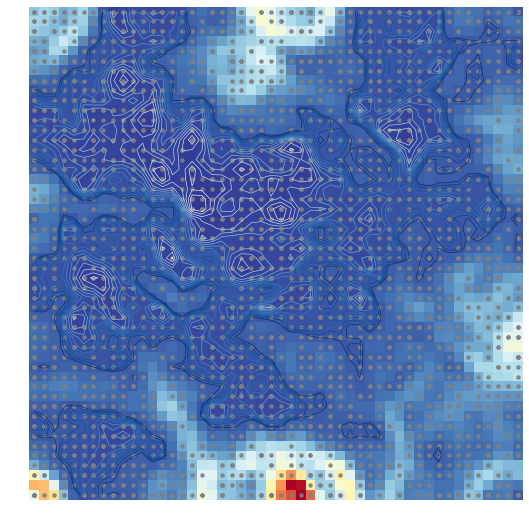

In [147]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

In [148]:
UMAT[1] #UMAT 1 is a 50 x 50 array
greyMat = UMAT[1]
greyMat

array([[0.31783974, 0.3628945 , 0.33666083, 0.26139439, 0.2953729 ,
        0.36213069, 0.23879378, 0.09351956, 0.0611519 , 0.06914363,
        0.08497546, 0.08145807, 0.06996616, 0.07540354, 0.0807456 ,
        0.08804878, 0.12690101, 0.15124603, 0.12106744, 0.1158778 ,
        0.16365608, 0.30912476, 0.50329062, 0.55508457, 0.49807811,
        0.40829741, 0.34556483, 0.32743922, 0.25271031, 0.40888323,
        0.51771047, 0.28763851, 0.1188343 , 0.09709319, 0.08964503,
        0.09675434, 0.09182646, 0.07948601, 0.07713955, 0.08819556,
        0.08815158, 0.08234054, 0.13100892, 0.16357019, 0.15093873,
        0.14493579, 0.12333916, 0.13796026, 0.14171858, 0.0995786 ],
       [0.36307685, 0.35318744, 0.30305254, 0.25286767, 0.32405178,
        0.34862257, 0.19436868, 0.0842925 , 0.06702137, 0.06789931,
        0.08254016, 0.08921365, 0.08200109, 0.0796538 , 0.07967686,
        0.09253378, 0.11978732, 0.13270923, 0.11818267, 0.12567926,
        0.17173827, 0.25344612, 0.40619597, 0.5

In [149]:
UMAT[1][0] #this is and array of 50 values

array([0.31783974, 0.3628945 , 0.33666083, 0.26139439, 0.2953729 ,
       0.36213069, 0.23879378, 0.09351956, 0.0611519 , 0.06914363,
       0.08497546, 0.08145807, 0.06996616, 0.07540354, 0.0807456 ,
       0.08804878, 0.12690101, 0.15124603, 0.12106744, 0.1158778 ,
       0.16365608, 0.30912476, 0.50329062, 0.55508457, 0.49807811,
       0.40829741, 0.34556483, 0.32743922, 0.25271031, 0.40888323,
       0.51771047, 0.28763851, 0.1188343 , 0.09709319, 0.08964503,
       0.09675434, 0.09182646, 0.07948601, 0.07713955, 0.08819556,
       0.08815158, 0.08234054, 0.13100892, 0.16357019, 0.15093873,
       0.14493579, 0.12333916, 0.13796026, 0.14171858, 0.0995786 ])

update_title_pos
update_title_pos
update_title_pos
update_title_pos


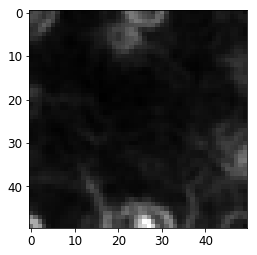

In [150]:
import matplotlib.pyplot as plt
plt.imshow(greyMat, cmap="gray")
plt.show()

In [151]:
UMAT[1]

array([[0.31783974, 0.3628945 , 0.33666083, 0.26139439, 0.2953729 ,
        0.36213069, 0.23879378, 0.09351956, 0.0611519 , 0.06914363,
        0.08497546, 0.08145807, 0.06996616, 0.07540354, 0.0807456 ,
        0.08804878, 0.12690101, 0.15124603, 0.12106744, 0.1158778 ,
        0.16365608, 0.30912476, 0.50329062, 0.55508457, 0.49807811,
        0.40829741, 0.34556483, 0.32743922, 0.25271031, 0.40888323,
        0.51771047, 0.28763851, 0.1188343 , 0.09709319, 0.08964503,
        0.09675434, 0.09182646, 0.07948601, 0.07713955, 0.08819556,
        0.08815158, 0.08234054, 0.13100892, 0.16357019, 0.15093873,
        0.14493579, 0.12333916, 0.13796026, 0.14171858, 0.0995786 ],
       [0.36307685, 0.35318744, 0.30305254, 0.25286767, 0.32405178,
        0.34862257, 0.19436868, 0.0842925 , 0.06702137, 0.06789931,
        0.08254016, 0.08921365, 0.08200109, 0.0796538 , 0.07967686,
        0.09253378, 0.11978732, 0.13270923, 0.11818267, 0.12567926,
        0.17173827, 0.25344612, 0.40619597, 0.5

In [152]:
map_labels = som.cluster(n_clusters=5)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data

In [153]:
len(map_labels)

2500

In [154]:
len(data_labels)

3290

In [155]:
data_labels #append this to a column and outp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 4, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 4, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 4, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 4, 4, 2, 1, 2, 4,
       0, 2, 4, 4, 2, 2, 2, 1, 2, 2, 4, 2, 4, 4, 1, 2, 2, 4, 4, 3, 1, 4,
       4, 2, 1, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 1, 2, 0, 2,
       2, 4, 0, 2, 2, 2, 2, 2, 4, 4, 4, 1, 1, 2, 2, 4, 2, 2, 1, 3, 4, 4,
       3, 1, 2, 2, 1, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 1, 4, 4, 4,
       4, 4, 4, 2, 3, 1, 1, 4, 4, 0, 0, 2, 2, 4, 2, 4, 3, 2, 2, 4, 3, 3,
       1, 1, 4, 1, 3, 2, 2, 2, 1, 1, 3, 4, 2, 0, 2, 4, 4, 2, 2, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 2, 4, 1, 4, 3, 4, 1, 1, 3, 3, 2, 2, 2, 4,
       2, 2, 4, 3, 2, 1, 3, 4, 3, 3, 4, 2, 3, 1, 4,

In [156]:
type(data_labels)

numpy.ndarray

In [157]:
quakeLLM = np.column_stack((data_labels, quakeLLM)) #append in the beginning?

In [158]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
u.build_u_matrix(som, distance=1, row_normalized=False)


array([[0.31783974, 0.3628945 , 0.33666083, 0.26139439, 0.2953729 ,
        0.36213069, 0.23879378, 0.09351956, 0.0611519 , 0.06914363,
        0.08497546, 0.08145807, 0.06996616, 0.07540354, 0.0807456 ,
        0.08804878, 0.12690101, 0.15124603, 0.12106744, 0.1158778 ,
        0.16365608, 0.30912476, 0.50329062, 0.55508457, 0.49807811,
        0.40829741, 0.34556483, 0.32743922, 0.25271031, 0.40888323,
        0.51771047, 0.28763851, 0.1188343 , 0.09709319, 0.08964503,
        0.09675434, 0.09182646, 0.07948601, 0.07713955, 0.08819556,
        0.08815158, 0.08234054, 0.13100892, 0.16357019, 0.15093873,
        0.14493579, 0.12333916, 0.13796026, 0.14171858, 0.0995786 ],
       [0.36307685, 0.35318744, 0.30305254, 0.25286767, 0.32405178,
        0.34862257, 0.19436868, 0.0842925 , 0.06702137, 0.06789931,
        0.08254016, 0.08921365, 0.08200109, 0.0796538 , 0.07967686,
        0.09253378, 0.11978732, 0.13270923, 0.11818267, 0.12567926,
        0.17173827, 0.25344612, 0.40619597, 0.5

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


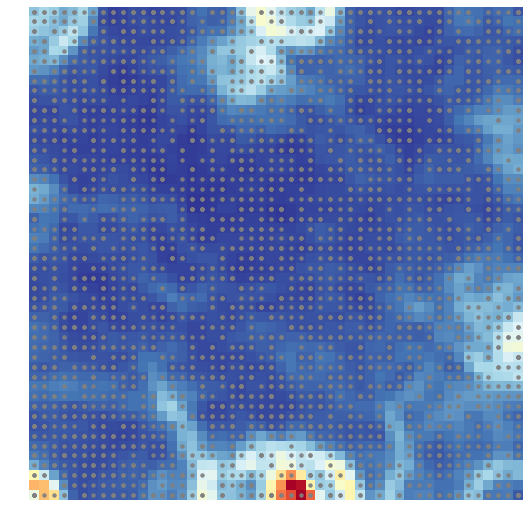

([], array([[0.31783974, 0.3628945 , 0.33666083, 0.26139439, 0.2953729 ,
         0.36213069, 0.23879378, 0.09351956, 0.0611519 , 0.06914363,
         0.08497546, 0.08145807, 0.06996616, 0.07540354, 0.0807456 ,
         0.08804878, 0.12690101, 0.15124603, 0.12106744, 0.1158778 ,
         0.16365608, 0.30912476, 0.50329062, 0.55508457, 0.49807811,
         0.40829741, 0.34556483, 0.32743922, 0.25271031, 0.40888323,
         0.51771047, 0.28763851, 0.1188343 , 0.09709319, 0.08964503,
         0.09675434, 0.09182646, 0.07948601, 0.07713955, 0.08819556,
         0.08815158, 0.08234054, 0.13100892, 0.16357019, 0.15093873,
         0.14493579, 0.12333916, 0.13796026, 0.14171858, 0.0995786 ],
        [0.36307685, 0.35318744, 0.30305254, 0.25286767, 0.32405178,
         0.34862257, 0.19436868, 0.0842925 , 0.06702137, 0.06789931,
         0.08254016, 0.08921365, 0.08200109, 0.0796538 , 0.07967686,
         0.09253378, 0.11978732, 0.13270923, 0.11818267, 0.12567926,
         0.17173827, 0.253446

In [159]:
u.show(som,
       distance2=1, 
       row_normalized=False, 
       show_data=True,
       contooor=False, blob=False)